##  plot the FPS vs percent of the empty road images

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
file = '../result/final_result.csv'
data = pd.read_csv(file)

data['Configure'] = data['Configure'].replace(['ERD (in cpu) + OD (in cpu)'], 'ERD (in CPU) + OD (in CPU)')
data['Configure'] = data['Configure'].replace(['ERD (in cpu) + OD (in gpu)'], 'ERD (in CPU) + OD (in GPU)')
data['Configure'] = data['Configure'].replace(['ERD (in gpu) + OD (in gpu)'], 'ERD (in GPU) + OD (in GPU)')
data1= data.where(data['Configure']== 'ERD (in GPU) + OD (in GPU)').dropna()
data2= data.where(data['Configure']== 'ERD (in CPU) + OD (in GPU)').dropna()
data3= data.where(data['Configure']== 'ERD (in CPU) + OD (in CPU)').dropna()    

data

,Empty road frame %,Configure,ERD+Yolov5,ERD+SSD,ERD+efficientDet
0,0%,ERD (in GPU) + OD (in GPU),45.5,20.8,8.9
1,0%,ERD (in CPU) + OD (in GPU),31.9,14.9,8.3
2,0%,ERD (in CPU) + OD (in CPU),17.7,8.2,5.8
3,10%,ERD (in GPU) + OD (in GPU),49.7,23.4,10.0
4,10%,ERD (in CPU) + OD (in GPU),33.2,16.0,8.8
5,10%,ERD (in CPU) + OD (in CPU),19.6,9.1,6.5
6,20%,ERD (in GPU) + OD (in GPU),53.9,24.8,11.3
7,20%,ERD (in CPU) + OD (in GPU),35.5,16.7,9.6
8,20%,ERD (in CPU) + OD (in CPU),20.5,9.8,7.3
9,30%,ERD (in GPU) + OD (in GPU),60.2,32.1,13.1


In [2]:
## for drawing line of object detection run only
data_od = pd.read_csv('../result/od_only.csv')
data_od_cpu=data_od[['Config','Empty road frame %','cpu']]
data_od_cpu = data_od_cpu.rename(columns ={'cpu':'fps'})
data_od_gpu = data_od[['Config','Empty road frame %','gpu']]
data_od_gpu = data_od_gpu.rename(columns ={'gpu':'fps'})
data_od_yolo=data_od.where(data_od['Config']== 'Yolov5').dropna()
data_od_ssd=data_od.where(data_od['Config']== 'SSD').dropna()
data_od_eff=data_od.where(data_od['Config']== 'efficientDet').dropna()
data_od_cpu

,Config,Empty road frame %,fps
0,Yolov5,0%,27.1
1,Yolov5,100%,27.1
2,SSD,0%,9.4
3,SSD,100%,9.4
4,efficientDet,0%,6.6
5,efficientDet,100%,6.6


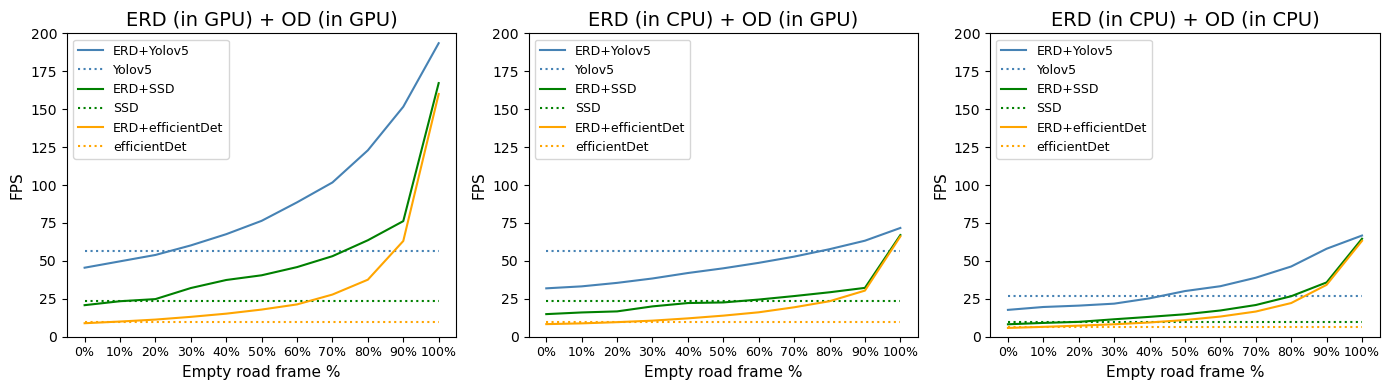

In [3]:
# plot 3 configurations
plot = plt.figure(figsize = (14,4))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=1.5)
# model_confs = ['EDR+Yolov5','EDR+SSD','ERD+efficientDet']
hw_confs = ['ERD (in GPU) + OD (in GPU)','ERD (in CPU) + OD (in GPU)','ERD (in CPU) + OD (in CPU)' ]
data_od_list = [data_od_gpu,data_od_gpu,data_od_cpu]
data_list = [data1, data2, data3]
for i, data in enumerate(data_list):
    plt.subplot(1,3,i+1)
    data_now = data_list[i]
    x= data_now['Empty road frame %']
    y1= data_now['ERD+Yolov5']
    y2= data_now['ERD+SSD']
    y3= data_now['ERD+efficientDet']
    
    data_od_selected = data_od_list[i]    
#     xx = data_od_selected.where(data_od_selected['Config']== 'Yolov5').dropna()['Empty road frame %']
    xx= ['0%','100%']
    yy1 = data_od_selected.where(data_od_selected['Config']== 'Yolov5').dropna()['fps']
    yy2 = data_od_selected.where(data_od_selected['Config']== 'SSD').dropna()['fps']
    yy3 = data_od_selected.where(data_od_selected['Config']== 'efficientDet').dropna()['fps']
    
    plt.plot(x, y1, label = 'ERD+Yolov5', color='steelblue')
    plt.plot(xx, yy1, label= 'Yolov5', color = 'steelblue', linestyle='dotted' )

    plt.plot(x, y2, label = 'ERD+SSD', color = 'green')
    plt.plot(xx, yy2 , label= 'SSD',  color = 'green', linestyle='dotted')
    
    plt.plot(x, y3, label = 'ERD+efficientDet', color = 'orange')    
    plt.plot(xx, yy3, label= 'efficientDet', color = 'orange', linestyle='dotted' )
    
    plt.legend(loc =2, fontsize = 9)
    plt.xticks(fontsize = 9)
    plt.title(hw_confs[i], fontsize = 14)
    plt.xlabel('Empty road frame %', fontsize = 11)
    plt.ylabel('FPS', fontsize = 11)
    plt.ylim(0, 200)
    plt.tight_layout()
    plt.savefig('../result/erd_fps.pdf')


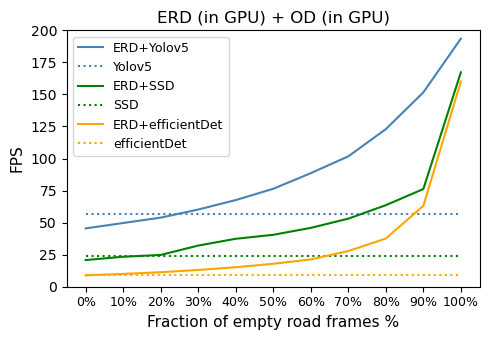

In [16]:
# plot only 1 configurations
plot = plt.figure(figsize = (5,3.5))
# plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=1.5)
# model_confs = ['EDR+Yolov5','EDR+SSD','ERD+efficientDet']
hw_confs = ['ERD (in GPU) + OD (in GPU)','ERD (in CPU) + OD (in GPU)','ERD (in CPU) + OD (in CPU)' ]
data_od_list = [data_od_gpu,data_od_gpu,data_od_cpu]
data_list = [data1]
for i, data in enumerate(data_list):
#     plt.subplot(1,3,i+1)
    data_now = data_list[i]
    x= data_now['Empty road frame %']
    y1= data_now['ERD+Yolov5']
    y2= data_now['ERD+SSD']
    y3= data_now['ERD+efficientDet']
    
    data_od_selected = data_od_list[i]    
#     xx = data_od_selected.where(data_od_selected['Config']== 'Yolov5').dropna()['Empty road frame %']
    xx= ['0%','100%']
    yy1 = data_od_selected.where(data_od_selected['Config']== 'Yolov5').dropna()['fps']
    yy2 = data_od_selected.where(data_od_selected['Config']== 'SSD').dropna()['fps']
    yy3 = data_od_selected.where(data_od_selected['Config']== 'efficientDet').dropna()['fps']
    
    plt.plot(x, y1, label = 'ERD+Yolov5', color='steelblue')
    plt.plot(xx, yy1, label= 'Yolov5', color = 'steelblue', linestyle='dotted' )

    plt.plot(x, y2, label = 'ERD+SSD', color = 'green')
    plt.plot(xx, yy2 , label= 'SSD',  color = 'green', linestyle='dotted')
    
    plt.plot(x, y3, label = 'ERD+efficientDet', color = 'orange')    
    plt.plot(xx, yy3, label= 'efficientDet', color = 'orange', linestyle='dotted' )
    
    plt.legend(loc =2, fontsize = 9)
    plt.xticks(fontsize = 9)
    plt.title(hw_confs[i], fontsize = 12)
    plt.xlabel('Fraction of empty road frames %', fontsize = 11)
    plt.ylabel('FPS', fontsize = 11)
    plt.ylim(0, 200)
    plt.tight_layout()
    plt.savefig('../result/erd_fps_1.pdf')
